![Worflow](workflow3.png)


    1_Define Problem
    2_Specify Inputs & Outputs
    3_Exploratory data analysis
    4_Data Collection
    5_Data Preprocessing
    6_Data Cleaning
    7_Visualization
    8_Model Design, Training, and Offline Evaluation
    9_Model Deployment, Online Evaluation, and Monitoring
    10_Model Maintenance, Diagnosis, and Retraining


## 1_DEFINE PROBLEM

* Description informelle

    je veux ecrire un programme capable de predire la consommation electrique pour une annee d'essai

* Formalisme selon Tom Mitchell

    Tache (T): Estimer la consomation electrique

    Performance(P): la precision de la prediction faite par l'algorithme et a quel point elle est proche de la              consomation reelle (loc_secondary).

    Experience(E): la temperature, l'humidite et la consommation reelle, les dates

* Benefice attendu: 

    apprendre sur les donnees manquantes, sur la gestion de glissement de date, apprentissage semi-supervise

* How does your company expact to use and benfit from your model.

    In operational conditions, the new consumption profiles would be integrated to electricity supply pricing analysis. 
    
    BCM Energy is a start-up based in Lyon and created in 2015. BCM operates on the whole value chain of renewable electricity, from production assets management on electricity markets (Epexspot, EEX) to electricity supply to final consumers through the brand Planète OUI.
    
    Planète OUI, created in 2007, is one of the first French green electricity supplier. The company supplies tens of thousands of homes and professionals and covers more than 95 % of metropolitan France (Enedis network). Planète OUI promotes an ecology constructive and made available for all. It has integrated BCM Energy’s perimeter in 2017.
    
    Planete OUI has to offer green electricity supply with prices adapted to the consumption profiles of its clients. The electricity is indeed bough on the electricity markets, where prices are highly variable during a day.
   
    A site with a high share of consumption when prices are low, for example at mid-afternoon, will be supplied at lower costs than a site consuming electricity mainly during peak price intervals. The consumption profile of an installation has then to be appraised to compute the best estimation of supply tariffs, allowing Planète OUI to meet its running costs while supplying its client at the best price.
    

## 2_Specify Inputs & Outputs

**donnees utiles pour predire une consomation electrique**
    * humidite,
    * Temperature,
    * Moyenne Nationale de Temperature,
    * Jour de la semaine,
    * Periode de l'annees,
**recuperer ces donnees**
    * API externes, 
    * beses de donnnes,
    * openDara
    * donnees d'entreprises

**Problem Fetures**

This data set contains information about 13 features
* ID
* timestamp
* temp_1
* temp_2
* mean_national_temp
* humidity_1
* humidity_2
* loc_1
* loc_2
* loc_secondary_1
* loc_secondary_2
* loc_secondary_3
* consumption_secondary_1
* consumption_secondary_2
* consumption_secondary_3

**Aim**

The job is to predict the consumption of loc_1 and loc_2. For each ID in the test set, I must predict a Kwh value for the consumption1 and the consumption2 variables

**Variable**

* ID: ID du point de donnees (site)
    - have no impact on the outcome variable. Thus, it will be exclued fron analysis
* timestamp: Horodatage complet avec annee, mois, jour et heure (en heure local CET et CEST)
    - 1 heure entre chaque timestamp
    - format datastring then i must define the input format, use it to parse the original string then define the output format and use it to convrt it back. \df['Date'] = df['Date'].astype('datetime64[ns]')\df_train['datetime'] = pd.to_datetime(df_train['datetime'])\
    - format in the data set : 2016-11-01T00:00:00.0,T separateur date heure
    - http://icalendrier.fr/calendriers-saga/etudes-thematiques/iso-8601
* temp_1: Temperatures locales en °C 
    - it could be used in feature enginnering with the mean and the humidity1
* temp_2: Temperatures locales en °C
    -     - it could be used in feature enginnering with the mean and the humidity2
* mean_national_temp: Moyenne des temperatures nationales en C
    - it could be used in feature enginnering with the T1° and T1° and the humidity1 and humidity2
* humidity_1: Humidité relative locale (%)
    - it could be used in feature enginnering with the T1° and the mean T°
* humidity_2: Humidité relative locale (%)
    - it could be used in feature enginnering with the T2° and the mean T°
* loc_1: Coordonnees des sites etudies en degres decimaux et de la forme (latitude, longitude)
    - string, nominal datatype
    - use it on a map
* loc_2: Coordonnees des sites etudies en degres decimaux et de la forme (latitude, longitude)
    - string,, nominal datatype, 
    - use it on a map
* loc_secondary_1: Coordonnees des sites secondaires en degres decimaux et de la forme (latitude, longitude)
    - string, , nominal datatype,
    - use it on a map
    - it could be used in feature engineering to compare at loc 1 and loc 2
* loc_secondary_2: Coordonnees des sites secondaires en degres decimaux et de la forme (latitude, longitude)
    - string, , nominal datatype, 
    - it could be used in feature engineering to compare at loc 1 and loc 2
    - use it on a map
* loc_secondary_3: Coordonnees des sites secondaires en degres decimaux et de la forme (latitude, longitude)
    - string, , nominal datatype, 
    - it could be used in feature engineering to compare at loc 1 and loc 2
    - use it on a map 
* consumption_secondary_1: kWh) donnees de consommation de 3 sites secondaires dont les correlations avec les sites etudiees peubvent etre utiles
    - to estimate the consumption
* consumption_secondary_2: (kWh) donnees de consommation de 3 sites secondaires dont les correlations avec les sites etudiees peubvent etre utiles
    - to estimate the consumption
* consumption_secondary_3: (kWh) donnees de consommation de 3 sites secondaires dont les correlations avec les sites etudiees peubvent etre utiles
    - to estimate the consumption

**Types of Features**

*Categorical*
    - Une variable catégorielle est une variable qui a deux catégories ou plus et chaque valeur de cette caractéristique peut être catégorisée par elles. Par exemple, le sexe est une variable catégorielle ayant deux catégories (homme et femme). Maintenant, nous ne pouvons pas trier ou donner d'ordre à de telles variables. Elles sont également connues sous le nom de variables nominales. Elles mesurent des etats, il n'y a pas d'echelle de valeurs. 
    - loc_1, loc_2, loc_secondary_2, loc_secondary_1, loc_secondary_3,

*Ordinal*
    - Une variable ordinale est similaire aux valeurs catégorielles, mais la différence entre elles est que nous pouvons avoir un ordre ou un tri relatif entre les valeurs. Par exemple : Si nous avons une fonction comme Hauteur avec des valeurs Tall, Medium, Short, alors Hauteur est une variable ordinale. Ici nous pouvons avoir un tri relatif dans la variable.
    - timestamp, 

*Continous*
    - A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column. 
    - temp_1, temp_2, mean_national_temp, humidity_1, humidity_2, consumption_secondary_1, consumption_secondary_2, consumption_secondary_3

**Inputs & Outputs**

*Inputs*
- input_test_cdKcI0e.csv
- input_training_ssnsrY0.csv
- output_training_Uf11I9I.csv

*Ouputs*
- My score is the consumption for each loc correctly predict, the accuracy
- The output should have exactly 3 columns:
        - ID(sorted in order)
        - consumption_loc_1(contains value in Kwh)
        - consumption_loc_2(contains value in Kwh)

## 3_Select Framework

**Import**

In [173]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import os # Le module d'OS en Python fournit un moyen d'utiliser les fonctionnalités dépendantes du système d'exploitation. 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
import warnings
import matplotlib as mpl
import datetime as dt
from datetime import datetime
import calendar


**better code readability**

In [174]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline


I use Jupyter Notebook for my notes and spyder for the data work. and I can use JN on iMac but not spyder

## 4_Exploratory Data Analysis(EDA)

**1-Data Collection**

La collecte de données est le processus de collecte et de mesure de données, d'informations ou de toute variable d'intérêt d'une manière normalisée et établie qui permet au collecteur de répondre ou de tester des hypothèses et d'évaluer les résultats de la collecte particulière[techopedia].
Je commence la collecte des données par la formation et le test des ensembles de données dans Pandas DataFrames.

In [175]:
rawData_trainInput = pd.read_csv('data_set1/input_training_ssnsrY0.csv')
rawData_trainOutput = pd.read_csv('data_set1/output_training_Uf11I9I.csv')
rawData_testInput = pd.read_csv('data_set1/input_test_cdKcI0e.csv')
trainInput = rawData_trainInput.copy(deep=True)
trainOutput = rawData_trainOutput.copy(deep=True)
testInput = rawData_testInput.copy(deep=True)

In [176]:
print('Train Input is:', trainInput.shape)
print('Train Output is:',trainOutput.shape)
print('Test Input is:',testInput.shape)



Train Input is: (8760, 15)
Train Output is: (8760, 3)
Test Input is: (8736, 15)


In [177]:
print(trainInput.head(2))
print('----------------------------------------------------------\n')
print(testInput.head(2))
print('----------------------------------------------------------\n')
print(trainOutput.head(2))




high = max(trainInput['timestamp'])
middle = trainInput['timestamp'][4250]
low = min(trainInput['timestamp'])
print(high)
print(middle)
print(low)

   ID              timestamp  temp_1  temp_2  mean_national_temp  humidity_1  \
0   0  2016-11-01T00:00:00.0     8.3     NaN                11.1        95.0   
1   1  2016-11-01T01:00:00.0     8.0     NaN                11.1        98.0   

   humidity_2            loc_1            loc_2   loc_secondary_1  \
0         NaN  (50.633, 3.067)  (43.530, 5.447)  (44.838, -0.579)   
1         NaN  (50.633, 3.067)  (43.530, 5.447)  (44.838, -0.579)   

    loc_secondary_2  loc_secondary_3  consumption_secondary_1  \
0  (47.478, -0.563)  (48.867, 2.333)                      143   
1  (47.478, -0.563)  (48.867, 2.333)                      141   

   consumption_secondary_2  consumption_secondary_3  
0                       74                      168  
1                       60                      162  
----------------------------------------------------------

     ID              timestamp  temp_1  temp_2  mean_national_temp  \
0  8760  2017-11-01T00:00:00.0     6.5     7.1                 

In [178]:
print(trainInput.dtypes)
print('----------------------------------------------------------\n')
print(testInput.dtypes)
print('----------------------------------------------------------\n')
print(trainOutput.dtypes)

ID                           int64
timestamp                   object
temp_1                     float64
temp_2                     float64
mean_national_temp         float64
humidity_1                 float64
humidity_2                 float64
loc_1                       object
loc_2                       object
loc_secondary_1             object
loc_secondary_2             object
loc_secondary_3             object
consumption_secondary_1      int64
consumption_secondary_2      int64
consumption_secondary_3      int64
dtype: object
----------------------------------------------------------

ID                           int64
timestamp                   object
temp_1                     float64
temp_2                     float64
mean_national_temp         float64
humidity_1                 float64
humidity_2                 float64
loc_1                       object
loc_2                       object
loc_secondary_1             object
loc_secondary_2             object
loc_secondary_3 

In [179]:
print("TrainInput:\n", trainInput.isnull().sum())
print('-'*10)
print("TestInput:\n", testInput.isnull().sum())    
print('-'*10)
print("TrainOutput:\n", trainOutput.isnull().sum())

TrainInput:
 ID                           0
timestamp                    0
temp_1                     171
temp_2                     331
mean_national_temp           0
humidity_1                 171
humidity_2                 332
loc_1                        0
loc_2                        0
loc_secondary_1              0
loc_secondary_2              0
loc_secondary_3              0
consumption_secondary_1      0
consumption_secondary_2      0
consumption_secondary_3      0
dtype: int64
----------
TestInput:
 ID                           0
timestamp                    0
temp_1                      34
temp_2                     243
mean_national_temp           0
humidity_1                  34
humidity_2                 243
loc_1                        0
loc_2                        0
loc_secondary_1              0
loc_secondary_2              0
loc_secondary_3              0
consumption_secondary_1      0
consumption_secondary_2      0
consumption_secondary_3      0
dtype: int64
--------

In [180]:
print('coordonnees loc_1:', trainInput['loc_1'][1], testInput['loc_1'][1])
print('coordonnees loc_2:',trainInput['loc_2'][1], trainInput['loc_2'][1])
print('coordonnees loc_secondary_1:',trainInput['loc_secondary_1'][1], trainInput['loc_secondary_1'][1])
print('coordonnees loc_secondary_2:',trainInput['loc_secondary_2'][1], trainInput['loc_secondary_2'][1])
print('coordonnees loc_secondary_3:',trainInput['loc_secondary_3'][1], trainInput['loc_secondary_3'][1])



coordonnees loc_1: (50.633, 3.067) (50.633, 3.067)
coordonnees loc_2: (43.530, 5.447) (43.530, 5.447)
coordonnees loc_secondary_1: (44.838, -0.579) (44.838, -0.579)
coordonnees loc_secondary_2: (47.478, -0.563) (47.478, -0.563)
coordonnees loc_secondary_3: (48.867, 2.333) (48.867, 2.333)


![Map des 5 points](map.png)

**2-Visualization**

In [181]:
trainInput['timestamp'].dtypes

dtype('O')

In [182]:
# converting timestamp

trainInput["date"] = trainInput.timestamp.apply(lambda x : x.split('T')[0])
trainInput["hour"] = trainInput.timestamp.apply(lambda x : x.split('T')[1].split(":")[0])
trainInput["weekday"] = trainInput.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
trainInput["month"] = trainInput.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])



In [183]:
trainInput['consumption_1'] = trainOutput['consumption_1'].values
trainInput['consumption_2'] = trainOutput['consumption_2'].values


In [184]:
s = pd.Series(trainInput['timestamp'])
s = pd.to_datetime(s)
trainInput['rangeInYear'] = s.dt.strftime('%j').astype(int)
day = trainInput['rangeInYear']
trainInput.dtypes

# high = max(trainInput['timestamp'])
# middle = trainInput['timestamp'][4250]
# low = min(trainInput['timestamp'])
# print(high)
# print(middle)
# print(low)

#print(trainInput['rangeInYear'][4250])

print(trainInput['rangeInYear'].dtypes)
list = trainInput['rangeInYear']




int64


In [185]:
# get the current day of the year
doy = trainInput['rangeInYear'][45]

# "day of year" ranges for the northern hemisphere
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

if doy in spring:
  season = 'spring'
elif doy in summer:
  season = 'summer'
elif doy in fall:
  season = 'fall'
else:
  season = 'winter'


print(doy)
print(season)

307
fall


In [186]:
def get_season(doy):
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)
    if doy in spring:
        season = 'spring'
    elif doy in summer:
      season = 'summer'
    elif doy in fall:
        season = 'fall'
    else:
        season = 'winter'
    return season


In [187]:
trainInput['season'] = trainInput['rangeInYear'].apply(lambda d : get_season(d))

In [188]:
trainInput.dtypes
trainInput.head(2)

,ID,timestamp,temp_1,temp_2,mean_national_temp,humidity_1,humidity_2,loc_1,loc_2,loc_secondary_1,...,consumption_secondary_2,consumption_secondary_3,date,hour,weekday,month,consumption_1,consumption_2,rangeInYear,season
0,0,2016-11-01T00:00:00.0,8.3,NaN,11.1,95.0,NaN,"(50.633, 3.067)","(43.530, 5.447)","(44.838, -0.579)",...,74,168,2016-11-01,00,Tuesday,November,100,93,306,fall
1,1,2016-11-01T01:00:00.0,8.0,NaN,11.1,98.0,NaN,"(50.633, 3.067)","(43.530, 5.447)","(44.838, -0.579)",...,60,162,2016-11-01,01,Tuesday,November,101,94,306,fall


In [189]:
trainInput['date'] = pd.to_datetime(trainInput['date']).dt.strftime("%Y%m%d").astype(int)
categoryVariableList = ["hour","weekday","month", "season"]
for var in categoryVariableList:
    trainInput[var] = trainInput[var].astype("category")


In [190]:
trainInput = trainInput.drop(["timestamp", "ID", 'rangeInYear'],axis=1)

[Text(0, 0.5, 'consumption_2'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Box Plot On Consumption loc2 Across Hour Of The Day')]

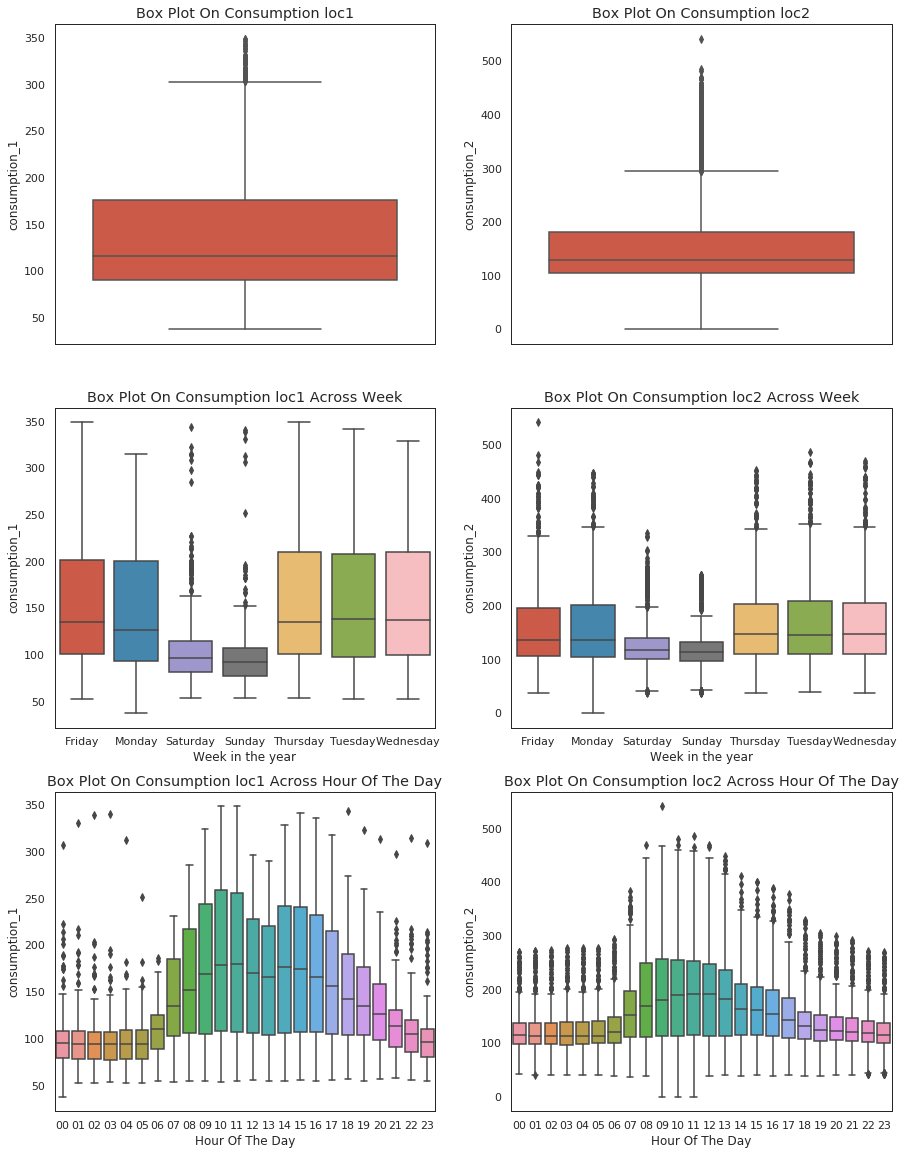

In [191]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 20)

sns.boxplot(data=trainInput,y="consumption_1",orient="v",ax=axes[0][0])
sns.boxplot(data=trainInput,y="consumption_2",orient="v",ax=axes[0][1])
sns.boxplot(data=trainInput,y="consumption_1",x="weekday",orient="v",ax=axes[1][0])
sns.boxplot(data=trainInput,y="consumption_2",x="weekday",orient="v",ax=axes[1][1])
sns.boxplot(data=trainInput,y="consumption_1",x="hour",orient="v",ax=axes[2][0])
sns.boxplot(data=trainInput,y="consumption_2",x="hour",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='consumption_1',title="Box Plot On Consumption loc1")
axes[0][1].set(ylabel='consumption_2',title="Box Plot On Consumption loc2")
axes[1][0].set(xlabel='Week in the year', ylabel='consumption_1',title="Box Plot On Consumption loc1 Across Week")
axes[1][1].set(xlabel='Week in the year', ylabel='consumption_2',title="Box Plot On Consumption loc2 Across Week")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='consumption_1',title="Box Plot On Consumption loc1 Across Hour Of The Day")
axes[2][1].set(xlabel='Hour Of The Day', ylabel='consumption_2',title="Box Plot On Consumption loc2 Across Hour Of The Day")



[Text(0, 0.5, 'Temp'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average temp national By Hour Of The Day Across Season'),
 None]

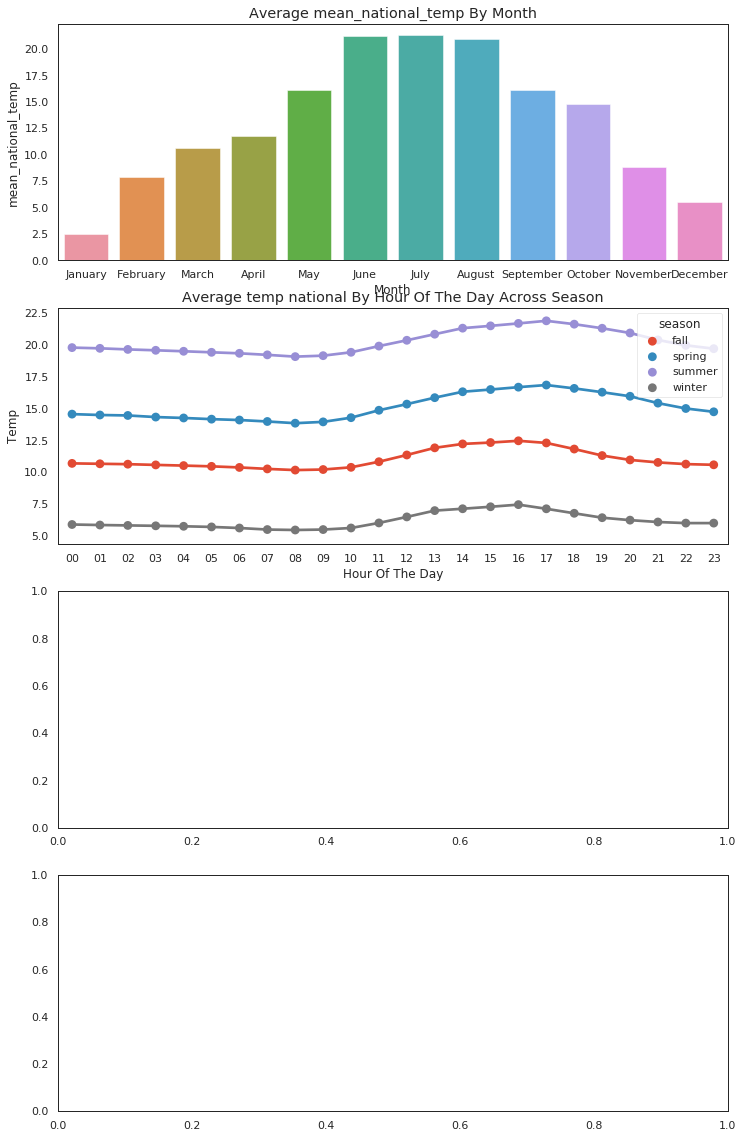

In [192]:
fig,(ax1,ax2,ax3, ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated1 = pd.DataFrame(trainInput.groupby("month")['mean_national_temp'].mean()).reset_index()
monthSorted1 = monthAggregated1.sort_values(by="mean_national_temp", ascending=False)
sns.barplot(data=monthSorted1, x="month", y="mean_national_temp", ax=ax1, order=sortOrder)
ax1.set(xlabel='Month', ylabel='mean_national_temp' ,title="Average mean_national_temp By Month")

hourAggregated = pd.DataFrame(trainInput.groupby(["hour","season"],sort=True)["mean_national_temp"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["mean_national_temp"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Temp',title="Average temp national By Hour Of The Day Across Season",label='big')
           

afficher les temperatures pour tous les loc et les loc_secondary

In [193]:
trainInput.dtypes

temp_1                      float64
temp_2                      float64
mean_national_temp          float64
humidity_1                  float64
humidity_2                  float64
loc_1                        object
loc_2                        object
loc_secondary_1              object
loc_secondary_2              object
loc_secondary_3              object
consumption_secondary_1       int64
consumption_secondary_2       int64
consumption_secondary_3       int64
date                          int64
hour                       category
weekday                    category
month                      category
consumption_1                 int64
consumption_2                 int64
season                     category
dtype: object

In [196]:
table = pd.DataFrame(trainInput)
table_loc = table.groupby(['month', ])

temp_1                      float64
temp_2                      float64
mean_national_temp          float64
humidity_1                  float64
humidity_2                  float64
loc_1                        object
loc_2                        object
loc_secondary_1              object
loc_secondary_2              object
loc_secondary_3              object
consumption_secondary_1       int64
consumption_secondary_2       int64
consumption_secondary_3       int64
date                          int64
hour                       category
weekday                    category
month                      category
consumption_1                 int64
consumption_2                 int64
season                     category
dtype: object

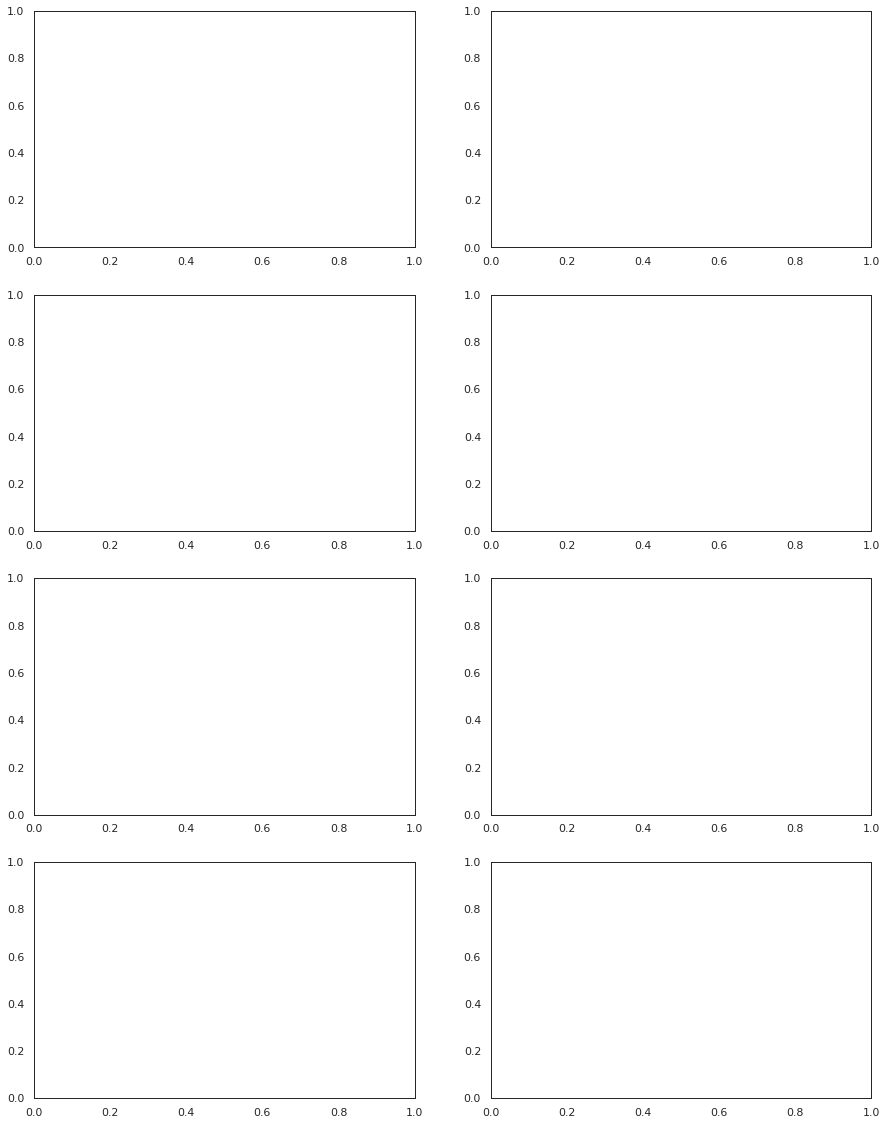

In [172]:
fig, ax = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(15, 20)



sns.distplot(trainInput['consumption_secondary_1'],orient="v",ax=axes[0][0])
